# Loading and Viewing the Data

In [1]:
#Name: Berke Derin Berktay
#First, we need to import the necessary libraries that we are going to use further on into the study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
#we first read the excel file's sheet labelled as 'ChildCareCentres'
df = pd.read_csv('INF2178_A3_data.csv')
df

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


In [2]:
df.head #let us try to get the sense of the data by simply observing it

<bound method NDFrame.head of        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0                 36.58          39.54                     33.822   
1                 50.82          44.44                     38.147   
2                 40.68          28.57                     28.108   
3                 32.57          23.57                     15.404   
4                 31.98          19.65                     18.727   
...                 ...            ...                        ...   
11928             32.51          25.68                     11.694   
11929             31.96          25.73                     21.461   
11930             40.44          30.50                     16.836   
11931             35.51          28.96                     28.864   
11932             23.47          14.30                     15.256   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
0                   49.37            50.10                       4

In [3]:
#lets figure out whether incomegroup divides the incomes into 3 variables based on the totalhouseholdincome
#by looking at tha max and mins
min_max_income = df.groupby('incomegroup')['totalhouseholdincome'].agg(min='min', max='max')

print(min_max_income)

                 min       max
incomegroup                   
1                1.0   39800.0
2            40000.0   69700.0
3            70000.0  150000.0


# Checking zero and null values

In [4]:
#First, let us perform some data wrangling to ensure that our data at hand is top notch.
#Let us check the amount of null and 0 values for each variable to see if we should replace or delete 
#some of these values/columns if there are too many or too little missing.
def emptyandzero(df):
    empty_cells = df.isna().sum()
    print("EMPTY CELL COUNTS:")
    print(empty_cells)
    
    numerics = df.select_dtypes(include=np.number)
    zeroes = []
    for i in range(len(numerics.columns)):
        zeroes.append(numerics.columns[i])
        zeroes.append((numerics[numerics.columns[i]] == 0).sum())
    print("\nZERO CELL COUNTS:")
    print(zeroes)
    

In [5]:
emptyandzero(df)

EMPTY CELL COUNTS:
fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

ZERO CELL COUNTS:
['fallreadingscore', 0, 'fallmathscore', 0, 'fallgeneralknowledgescore', 0, 'springreadingscore', 0, 'springmathscore', 0, 'springgeneralknowledgescore', 0, 'totalhouseholdincome', 0, 'incomeinthousands', 0, 'incomegroup', 0]


# Feature Engineering

In [6]:
#Now, let us perform some feature engineering to see if we can delete some useless columns and/or create useful ones

In [7]:
df['yearreadingscore'] = (df['fallreadingscore'] + df['springreadingscore']) / 2
df['yearmathscore'] = (df['fallmathscore'] + df['springmathscore']) / 2
df['yeargeneralknowledgescore'] = (df['fallgeneralknowledgescore'] + df['springgeneralknowledgescore']) / 2

In [8]:
#Throughout the analysis, it is pointless to keep several columns that we do not need to from now on due 
#to the new columns or are simply pointless such as incomeinthousands
df = df.drop(['fallreadingscore'], axis=1)
df = df.drop(['fallmathscore'], axis=1)
df = df.drop(['fallgeneralknowledgescore'], axis=1)
df = df.drop(['springreadingscore'], axis=1)
df = df.drop(['springmathscore'], axis=1)
df = df.drop(['springgeneralknowledgescore'], axis=1)
df = df.drop(['incomeinthousands'], axis=1)


df.head #check with a random entry

<bound method NDFrame.head of        totalhouseholdincome  incomegroup  yearreadingscore  yearmathscore  \
0                  140000.0            3            42.975         44.820   
1                  120000.0            3            67.160         51.685   
2                   90000.0            3            40.545         30.690   
3                   50000.0            2            33.355         29.410   
4                   55000.0            2            32.410         21.625   
...                     ...          ...               ...            ...   
11928               39000.0            1            39.070         24.975   
11929               26000.0            1            39.900         33.040   
11930               45000.0            2            45.185         35.750   
11931               28000.0            1            43.555         39.615   
11932               13000.0            1            27.440         15.895   

       yeargeneralknowledgescore  
0         

# Exploratory Data Analysis

/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


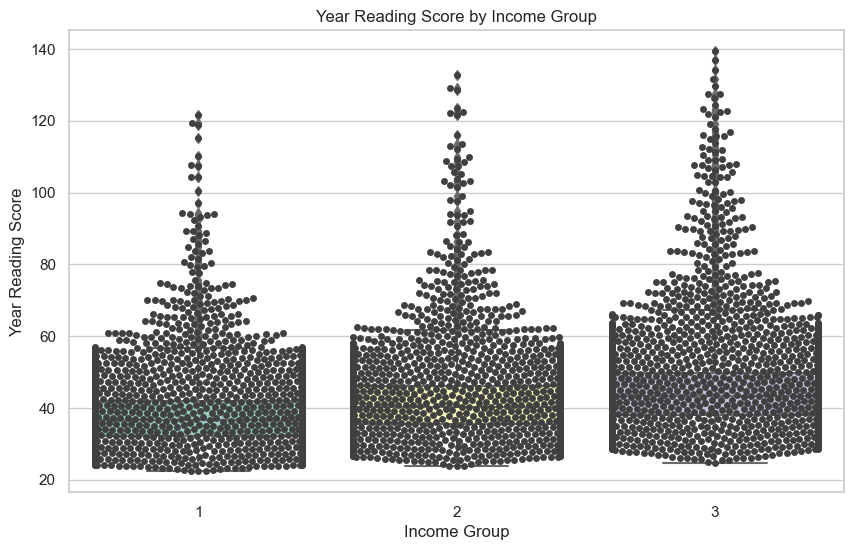

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='incomegroup', y='yearreadingscore', data=df, palette="Set3")
sns.swarmplot(x='incomegroup', y='yearreadingscore', data=df, color=".25")

plt.title('Year Reading Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Year Reading Score')

plt.show()

/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


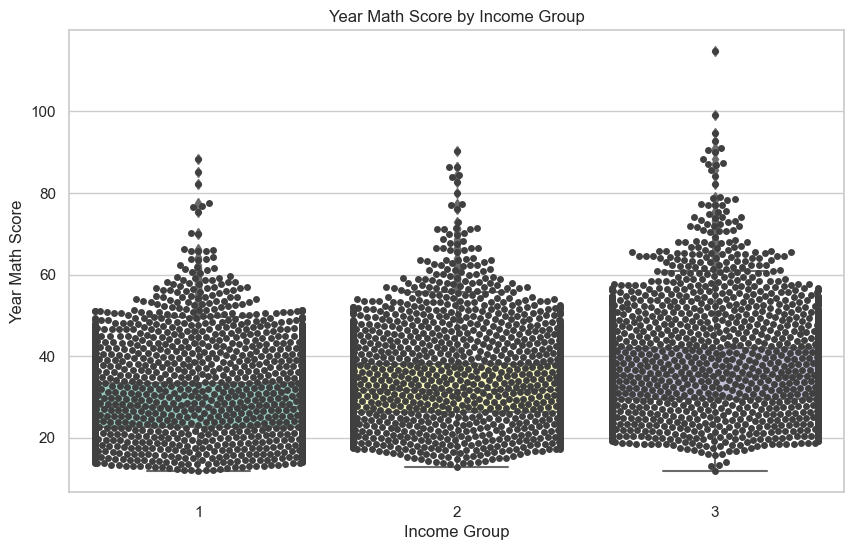

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='incomegroup', y='yearmathscore', data=df, palette="Set3")
sns.swarmplot(x='incomegroup', y='yearmathscore', data=df, color=".25")

plt.title('Year Math Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Year Math Score')

plt.show()

In [11]:
def summary_stats(label): #Baseline function that we will use for repetition prevention purposes
    
    mean = np.round(np.mean(label), 2)
    median = np.round(np.median(label), 2)
    minval = np.round(label.min(), 2)
    maxval = np.round(label.max(), 2)
    quartile1 = np.round(label.quantile(0.25), 2)
    quartile3 = np.round(label.quantile(0.75), 2)
    iqr = np.round(quartile3 - quartile1, 2) #computations for the EDA
    
    print('Min: %s' % minval)
    print('Max: %s' % maxval)
    print('Mean: %s' % mean)
    print('25th percentile: %s' % quartile1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile3)
    print('IQR : %s' % iqr)

In [12]:
group1reading = df[df['incomegroup'] == 1]['yearreadingscore']
group2reading = df[df['incomegroup'] == 2]['yearreadingscore']
group3reading = df[df['incomegroup'] == 3]['yearreadingscore']
group1math = df[df['incomegroup'] == 1]['yearmathscore']
group2math = df[df['incomegroup'] == 2]['yearmathscore']
group3math = df[df['incomegroup'] == 3]['yearmathscore']
print('\n Group 1 Reading summary statistics')
summary_stats(group1reading)
print('\n Group 2 Reading summary statistics')
summary_stats(group2reading)
print('\n Group 3 Reading summary statistics')
summary_stats(group3reading)
print('\n Group 1 Math summary statistics')
summary_stats(group1math)
print('\n Group 2 Math summary statistics')
summary_stats(group2math)
print('\n Group 3 Math summary statistics')
summary_stats(group3math)



 Group 1 Reading summary statistics
Min: 22.37
Max: 121.52
Mean: 38.23
25th percentile: 32.05
Median: 36.74
75th percentile: 41.92
IQR : 9.87

 Group 2 Reading summary statistics
Min: 23.7
Max: 132.61
Mean: 42.15
25th percentile: 35.52
Median: 40.21
75th percentile: 46.0
IQR : 10.48

 Group 3 Reading summary statistics
Min: 24.67
Max: 139.35
Mean: 46.05
25th percentile: 37.99
Median: 43.23
75th percentile: 49.7
IQR : 11.71

 Group 1 Math summary statistics
Min: 11.85
Max: 88.28
Mean: 28.9
25th percentile: 22.72
Median: 27.56
75th percentile: 33.53
IQR : 10.81

 Group 2 Math summary statistics
Min: 12.95
Max: 90.18
Mean: 33.02
25th percentile: 26.36
Median: 31.67
75th percentile: 38.17
IQR : 11.81

 Group 3 Math summary statistics
Min: 11.8
Max: 114.72
Mean: 36.71
25th percentile: 29.48
Median: 35.22
75th percentile: 42.01
IQR : 12.53


# One-Way ANCOVAS

In [13]:
df.head

<bound method NDFrame.head of        totalhouseholdincome  incomegroup  yearreadingscore  yearmathscore  \
0                  140000.0            3            42.975         44.820   
1                  120000.0            3            67.160         51.685   
2                   90000.0            3            40.545         30.690   
3                   50000.0            2            33.355         29.410   
4                   55000.0            2            32.410         21.625   
...                     ...          ...               ...            ...   
11928               39000.0            1            39.070         24.975   
11929               26000.0            1            39.900         33.040   
11930               45000.0            2            45.185         35.750   
11931               28000.0            1            43.555         39.615   
11932               13000.0            1            27.440         15.895   

       yeargeneralknowledgescore  
0         

In [14]:
#performing the oneway ancova for reading score - research question 1
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('yearreadingscore ~ yeargeneralknowledgescore + C(incomegroup)', data=df).fit()

ancova_results = sm.stats.anova_lm(model, typ=2)

print(ancova_results)

                                 sum_sq       df            F        PR(>F)
C(incomegroup)             1.402498e+04      2.0    67.318143  8.469463e-30
yeargeneralknowledgescore  3.176658e+05      1.0  3049.511682  0.000000e+00
Residual                   1.242637e+06  11929.0          NaN           NaN


In [15]:
#testing assumptions for reading score - research question 1

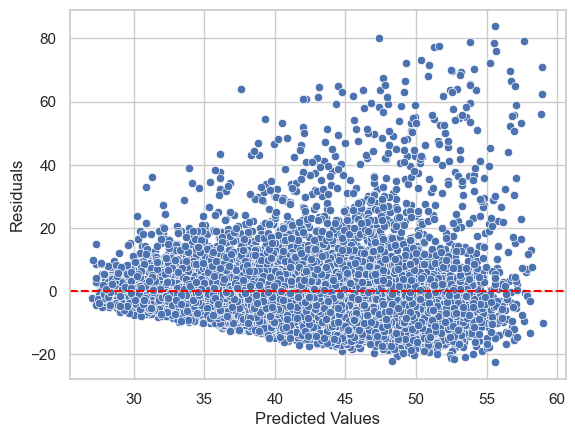

In [16]:
#checking linearity assumption
# Predicted vs. Residuals Plot
predicted_values = model.fittedvalues
residuals = model.resid

sns.scatterplot(x=predicted_values, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Shapiro-Wilk test: statistic=0.8038636445999146, p-value=0.0


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


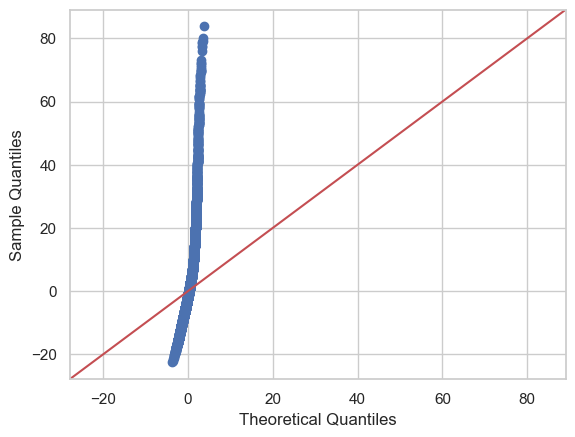

In [17]:
#checking normality assumption: Shapiro Wilk test and qqplot
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f"Shapiro-Wilk test: statistic={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Q-Q plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(model.resid, line='45')
plt.show()

In [21]:
#checking variance homoegenity assumption: breusch-pagan's test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 447.71280083416576, 'p-value': 1.0204862971468354e-96, 'f-value': 155.00311858515988, 'f p-value': 1.4832521033147978e-98}


In [22]:
#performing the oneway ancova for math score - research question 2
model = ols('yearmathscore ~ yeargeneralknowledgescore + C(incomegroup)', data=df).fit()

ancova_results = sm.stats.anova_lm(model, typ=2)

print(ancova_results)

                                  sum_sq       df            F        PR(>F)
C(incomegroup)               8638.204010      2.0    73.633092  1.649436e-32
yeargeneralknowledgescore  395600.561330      1.0  6744.293720  0.000000e+00
Residual                   699720.280895  11929.0          NaN           NaN


In [23]:
#testing assumptions for math score - research question 2

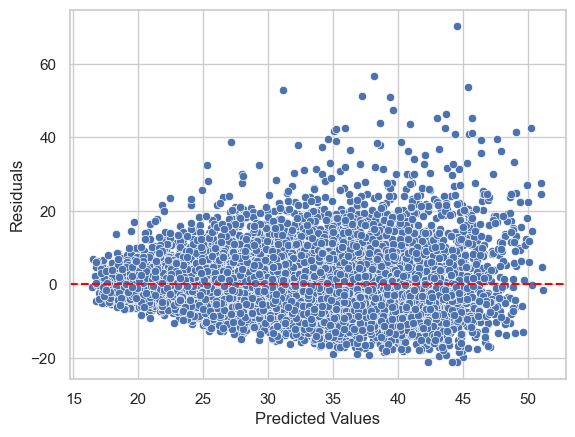

In [24]:
#checking linearity assumption
# Predicted vs. Residuals Plot
predicted_values = model.fittedvalues
residuals = model.resid

sns.scatterplot(x=predicted_values, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Shapiro-Wilk test: statistic=0.9446665048599243, p-value=0.0


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


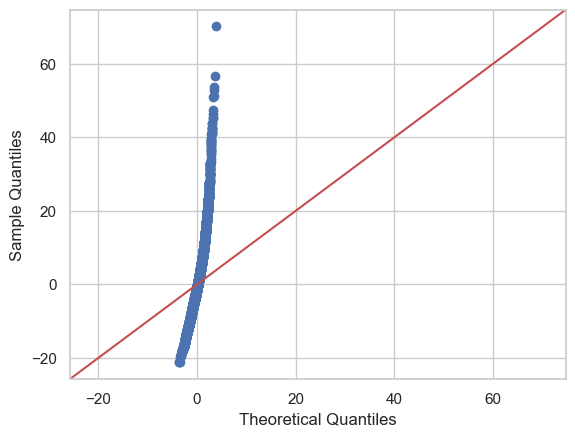

In [25]:
#checking normality assumption: Shapiro Wilk test and qqplot
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f"Shapiro-Wilk test: statistic={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Q-Q plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(model.resid, line='45')
plt.show()

In [26]:
#checking variance homoegenity assumption: breusch-pagan's test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 463.4460029432254, 'p-value': 3.9797230162781984e-100, 'f-value': 160.6702222402139, 'f p-value': 4.244640226057436e-102}
